# **Karakter Detektor Plat Nomer Kendaraan Indoesia dengan Algoritma Yolov8**

### **Abstrak**

Penelitian ini bertujuan untuk mengembangkan dan menguji model deteksi karakter pada plat nomor kendaraan bermotor menggunakan algoritma *You Only Look Once* versi 8 (YOLOv8). Model dirancang untuk mengenali karakter huruf dan angka pada plat motor dengan akurasi tinggi dan waktu inferensi yang efisien, sehingga mendukung aplikasi seperti sistem parkir otomatis dan pemantauan lalu lintas.

Dataset yang digunakan mencakup berbagai gambar plat motor dengan karakter dari angka 0–9 dan huruf A–Z, yang dibagi ke dalam data pelatihan dan pengujian. Hasil pelatihan menunjukkan nilai *precision* sebesar 96,92%, *recall* 92,51%, *mAP\@0.5* 96,37%, dan *mAP\@0.5-0.95* 84,94%. Sementara pada tahap pengujian, model berhasil mencapai *precision* 92,67%, *recall* 95,40%, *mAP\@0.5* 96,15%, dan *mAP\@0.5-0.95* 86,76%. Waktu rata-rata inferensi model pada data uji tercatat sebesar 9,15 ms per gambar.

Hasil ini menunjukkan bahwa YOLOv8 mampu mendeteksi karakter plat motor secara akurat dan cepat, serta layak untuk diimplementasikan dalam aplikasi nyata. Beberapa kelas karakter dengan jumlah data terbatas masih memerlukan optimasi melalui augmentasi data atau penambahan sampel untuk meningkatkan kinerja deteksi secara menyeluruh.

# **Data Wrangling**

## Install Library

In [1]:
!nvidia-smi

Mon Jul  7 14:20:02 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 62.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [4]:
!pip install easyocr ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 20.2 MB/s eta 0:00:00


## Import Library

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
from roboflow import Roboflow
from PIL import Image
import pandas as pd
import cv2
import random
import zipfile

plt.rcParams['figure.figsize'] = [15, 30]

## Dwonload data

In [6]:
# Dwonload data from Roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="n4Jb4ewaBFmL1d05b16s")
project = rf.workspace("test-lt9f2").project("indonesia-license-plate-character-recognition")
version = project.version(4)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to indonesia-license-plate-character-recognition-4 in yolov5pytorch:: 100%|██████████| 2150/2150 [00:01<00:00, 2030.66it/s]


## Data loading

In [7]:
# @title Baca data
# Path ke dataset
base_dir = 'indonesia-license-plate-character-recognition-4'

# Hitung file gambar di setiap folder
def count_images(folder):
    image_dir = os.path.join(base_dir, folder, 'images')
    return len([f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png', '.jpeg'))])

n_train = count_images('train')
n_val = count_images('valid')
n_test = count_images('test')

total = n_train + n_val + n_test

# Print hasil
print(f"Train : {n_train} ({n_train/total:.2%})")
print(f"Valid : {n_val} ({n_val/total:.2%})")
print(f"Test  : {n_test} ({n_test/total:.2%})")
print(f"Total : {total}")

Train : 749 (70.07%)
Valid : 214 (20.02%)
Test  : 106 (9.92%)
Total : 1069


# **Ekplorasi Data Analisis**

Train : 749 (70.07%)
Valid : 214 (20.02%)
Test  : 106 (9.92%)
Total : 1069


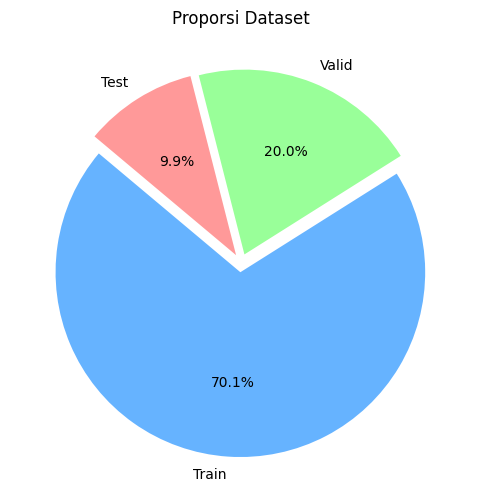

In [8]:
# @title Distribusi dataset

# Path dataset
base_dir = 'indonesia-license-plate-character-recognition-4'

# Hitung file gambar di setiap folder
def count_images(folder):
    image_dir = os.path.join(base_dir, folder, 'images')
    return len([f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png', '.jpeg'))])

# Hitung jumlah
n_train = count_images('train')
n_val = count_images('valid')
n_test = count_images('test')

total = n_train + n_val + n_test

# Print hasil
print(f"Train : {n_train} ({n_train/total:.2%})")
print(f"Valid : {n_val} ({n_val/total:.2%})")
print(f"Test  : {n_test} ({n_test/total:.2%})")
print(f"Total : {total}")

# Pie chart
labels = ['Train', 'Valid', 'Test']
sizes = [n_train, n_val, n_test]
colors = ['#66b3ff', '#99ff99', '#ff9999']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=(0.05, 0.05, 0.05))
plt.title('Proporsi Dataset')
plt.show()


# **Preprocesing**

In [8]:
# @title konversi label training segmentasi ke bounding box

def convert_polygon_to_bbox(input_label_folder, output_label_folder):
    """
    Mengonversi label polygon YOLO ke format bbox (x_center, y_center, width, height)

    Args:
        input_label_folder (str): Path folder label input (polygon)
        output_label_folder (str): Path folder label output (bbox)

    """
    os.makedirs(output_label_folder, exist_ok=True)

    for filename in os.listdir(input_label_folder):
        if filename.endswith('.txt'):
            input_path = os.path.join(input_label_folder, filename)
            output_path = os.path.join(output_label_folder, filename)

            with open(input_path, 'r') as f:
                lines = f.readlines()

            new_lines = []
            for line in lines:
                parts = line.strip().split()
                cls = parts[0]
                coords = list(map(float, parts[1:]))

                # Reshape jadi (N, 2)
                points = np.array(coords).reshape(-1, 2)

                # Cari bbox
                x_min = np.min(points[:, 0])
                x_max = np.max(points[:, 0])
                y_min = np.min(points[:, 1])
                y_max = np.max(points[:, 1])

                x_center = (x_min + x_max) / 2
                y_center = (y_min + y_max) / 2
                width = x_max - x_min
                height = y_max - y_min

                new_line = f"{cls} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}"
                new_lines.append(new_line)

            with open(output_path, 'w') as f:
                for nl in new_lines:
                    f.write(nl + '\n')

    print(f"✅ Konversi selesai! Label baru ada di folder: {output_label_folder}")

In [9]:
# @title Proses konversi
convert_polygon_to_bbox(
    input_label_folder='indonesia-license-plate-character-recognition-4/train/labels',
    output_label_folder='indonesia-license-plate-character-recognition-4/train/labels_bbox'
)

convert_polygon_to_bbox(
    input_label_folder='indonesia-license-plate-character-recognition-4/valid/labels',
    output_label_folder='indonesia-license-plate-character-recognition-4/valid/labels_bbox'
)

convert_polygon_to_bbox(
    input_label_folder='indonesia-license-plate-character-recognition-4/test/labels',
    output_label_folder='indonesia-license-plate-character-recognition-4/test/labels_bbox'
)

✅ Konversi selesai! Label baru ada di folder: indonesia-license-plate-character-recognition-4/train/labels_bbox
✅ Konversi selesai! Label baru ada di folder: indonesia-license-plate-character-recognition-4/valid/labels_bbox
✅ Konversi selesai! Label baru ada di folder: indonesia-license-plate-character-recognition-4/test/labels_bbox


# **Modeling**

In [11]:
from ultralytics import YOLO

# Load model YOLOv8 (boleh pilih: yolov8n.pt, yolov8s.pt, yolov8m.pt, yolov8l.pt, yolov8x.pt)
model = YOLO("yolov8n.pt")  # nano, ringan & cepat untuk start

# Training
model.train(
    data="indonesia-license-plate-character-recognition-4/data.yaml",      # path ke dataset yaml
    epochs=100,            # jumlah epoch
    imgsz=640,             # ukuran gambar input
    batch=16,              # sesuaikan dengan RAM/GPU
    name="yolo8-plat"      # nama eksperimen (output di runs/detect/yolo8-plat)
)

Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=indonesia-license-plate-character-recognition-4/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo8-plat2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.

100%|██████████| 755k/755k [00:00<00:00, 27.8MB/s]

Overriding model.yaml nc=80 with nc=36

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

Model summary: 129 layers, 3,017,868 parameters, 3,017,852 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 118MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 736.5±619.3 MB/s, size: 25.1 KB)


train: Scanning /content/indonesia-license-plate-character-recognition-4/train/labels... 749 images, 0 backgrounds, 0 corrupt: 100%|██████████| 749/749 [00:00<00:00, 2296.81it/s]

train: New cache created: /content/indonesia-license-plate-character-recognition-4/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 238.2±222.7 MB/s, size: 69.7 KB)


val: Scanning /content/indonesia-license-plate-character-recognition-4/valid/labels... 214 images, 0 backgrounds, 0 corrupt: 100%|██████████| 214/214 [00:00<00:00, 1426.78it/s]

val: New cache created: /content/indonesia-license-plate-character-recognition-4/valid/labels.cache


Plotting labels to runs/detect/yolo8-plat2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00025, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolo8-plat2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.33G     0.9722      4.618      1.021        211        640: 100%|██████████| 47/47 [00:16<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.38it/s]


                   all        214       1612      0.053      0.068     0.0349     0.0261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.48G     0.7786      3.622     0.8948        199        640: 100%|██████████| 47/47 [00:13<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.60it/s]


                   all        214       1612      0.545       0.12      0.109     0.0923

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.66G     0.7503      2.784     0.8956        207        640: 100%|██████████| 47/47 [00:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.42it/s]

                   all        214       1612      0.513      0.211      0.249       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.68G     0.7407       2.13     0.9155        159        640: 100%|██████████| 47/47 [00:13<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.42it/s]

                   all        214       1612      0.599      0.422      0.421      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.69G     0.7097      1.702     0.9165        174        640: 100%|██████████| 47/47 [00:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.27it/s]


                   all        214       1612      0.593      0.543       0.54      0.459

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.71G     0.6732      1.422     0.9098        134        640: 100%|██████████| 47/47 [00:14<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.51it/s]


                   all        214       1612      0.636      0.599      0.644      0.556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.73G     0.6493      1.226      0.902        210        640: 100%|██████████| 47/47 [00:13<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.46it/s]

                   all        214       1612      0.671      0.671      0.705       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.74G     0.6481      1.145     0.8999        134        640: 100%|██████████| 47/47 [00:14<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.68it/s]


                   all        214       1612      0.695      0.733      0.753      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.76G     0.6404      1.047     0.8975        190        640: 100%|██████████| 47/47 [00:13<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.49it/s]


                   all        214       1612      0.785      0.757      0.814      0.705

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.78G     0.6251     0.9799     0.8942        180        640: 100%|██████████| 47/47 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.33it/s]

                   all        214       1612      0.842       0.78      0.838      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100       2.8G     0.6144      0.932     0.8902        193        640: 100%|██████████| 47/47 [00:13<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.61it/s]


                   all        214       1612      0.826      0.818      0.867      0.754

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.81G     0.6016     0.8886     0.8876        194        640: 100%|██████████| 47/47 [00:13<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.29it/s]


                   all        214       1612      0.841      0.854       0.89      0.776

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.83G     0.6069     0.8668     0.8845        192        640: 100%|██████████| 47/47 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.36it/s]


                   all        214       1612      0.853      0.858      0.899      0.783

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.85G      0.593     0.8306     0.8806        150        640: 100%|██████████| 47/47 [00:13<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.47it/s]


                   all        214       1612      0.882      0.874      0.913      0.795

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.87G     0.5916     0.8085     0.8812        207        640: 100%|██████████| 47/47 [00:13<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.76it/s]


                   all        214       1612      0.879      0.885      0.918        0.8

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.88G     0.5859     0.7932     0.8749        155        640: 100%|██████████| 47/47 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.47it/s]

                   all        214       1612      0.894       0.89      0.923      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100       2.9G      0.588     0.7791     0.8798        184        640: 100%|██████████| 47/47 [00:13<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.32it/s]


                   all        214       1612      0.917      0.868      0.928      0.808

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.92G     0.5856     0.7772     0.8754        187        640: 100%|██████████| 47/47 [00:13<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.75it/s]


                   all        214       1612      0.904      0.897      0.933      0.816

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.93G     0.5731     0.7349     0.8729        219        640: 100%|██████████| 47/47 [00:13<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.40it/s]


                   all        214       1612      0.908      0.887      0.931      0.817

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.95G     0.5674     0.7336     0.8716        217        640: 100%|██████████| 47/47 [00:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.85it/s]

                   all        214       1612      0.928      0.872      0.934      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.97G     0.5781      0.727     0.8773        159        640: 100%|██████████| 47/47 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.94it/s]


                   all        214       1612      0.902      0.895      0.939      0.821

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.98G     0.5705      0.707     0.8715        162        640: 100%|██████████| 47/47 [00:13<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.39it/s]


                   all        214       1612      0.915      0.915      0.941      0.816

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100         3G     0.5622      0.685     0.8677        166        640: 100%|██████████| 47/47 [00:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.49it/s]


                   all        214       1612      0.913      0.924      0.943      0.828

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.02G     0.5549      0.682      0.868        188        640: 100%|██████████| 47/47 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.38it/s]


                   all        214       1612      0.924      0.914      0.942      0.824

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.04G     0.5587     0.6858     0.8676        233        640: 100%|██████████| 47/47 [00:14<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.67it/s]


                   all        214       1612       0.95      0.888      0.944      0.827

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.05G     0.5612     0.6811     0.8659        151        640: 100%|██████████| 47/47 [00:13<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.46it/s]


                   all        214       1612      0.927      0.919      0.948      0.828

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.07G     0.5462     0.6637     0.8642        125        640: 100%|██████████| 47/47 [00:13<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]


                   all        214       1612      0.943       0.91      0.953      0.836

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.09G      0.549     0.6404     0.8632        192        640: 100%|██████████| 47/47 [00:14<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.33it/s]

                   all        214       1612      0.947      0.894      0.949      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       3.1G     0.5514     0.6544     0.8665        211        640: 100%|██████████| 47/47 [00:14<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.57it/s]


                   all        214       1612      0.934      0.928      0.952      0.833

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.12G     0.5415     0.6347      0.861        224        640: 100%|██████████| 47/47 [00:14<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.47it/s]


                   all        214       1612      0.942       0.92      0.955      0.836

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.14G     0.5455     0.6413     0.8652        191        640: 100%|██████████| 47/47 [00:13<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.42it/s]


                   all        214       1612      0.939       0.93      0.953      0.836

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.16G      0.539     0.6413     0.8631        143        640: 100%|██████████| 47/47 [00:15<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


                   all        214       1612      0.949      0.917      0.953      0.835

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.17G     0.5344     0.6151     0.8623        166        640: 100%|██████████| 47/47 [00:15<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.70it/s]


                   all        214       1612      0.941      0.929      0.953      0.836

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.19G      0.533     0.6225     0.8616        202        640: 100%|██████████| 47/47 [00:13<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.49it/s]


                   all        214       1612      0.945      0.932      0.958      0.843

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.21G     0.5489     0.6278      0.865        217        640: 100%|██████████| 47/47 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.38it/s]


                   all        214       1612      0.947      0.918      0.956      0.842

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.22G     0.5405      0.622      0.866        201        640: 100%|██████████| 47/47 [00:14<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.68it/s]


                   all        214       1612      0.949      0.928      0.954      0.837

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.24G     0.5298     0.6004     0.8618        230        640: 100%|██████████| 47/47 [00:13<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.40it/s]


                   all        214       1612      0.952      0.921      0.956      0.842

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.26G     0.5308     0.5946     0.8621        171        640: 100%|██████████| 47/47 [00:13<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.46it/s]


                   all        214       1612      0.951      0.924      0.956      0.844

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.28G     0.5331     0.5944      0.857        165        640: 100%|██████████| 47/47 [00:14<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.82it/s]

                   all        214       1612      0.957      0.915      0.954      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.29G     0.5278     0.5839     0.8574        190        640: 100%|██████████| 47/47 [00:14<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.24it/s]


                   all        214       1612      0.935      0.932      0.954      0.839

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.31G     0.5255      0.596     0.8592        204        640: 100%|██████████| 47/47 [00:14<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.65it/s]


                   all        214       1612      0.955      0.914      0.955      0.838

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.33G     0.5269      0.586     0.8573        173        640: 100%|██████████| 47/47 [00:13<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.24it/s]


                   all        214       1612      0.956      0.925      0.957      0.838

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.34G     0.5286     0.5817     0.8612        178        640: 100%|██████████| 47/47 [00:13<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.43it/s]

                   all        214       1612      0.931      0.931      0.956      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.36G     0.5254     0.5764     0.8564        149        640: 100%|██████████| 47/47 [00:14<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.57it/s]


                   all        214       1612      0.947      0.927      0.959      0.841

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.58G     0.5179     0.5727     0.8563        213        640: 100%|██████████| 47/47 [00:13<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.49it/s]


                   all        214       1612      0.936      0.932      0.959      0.845

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100       3.6G     0.5176     0.5628     0.8575        223        640: 100%|██████████| 47/47 [00:13<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.66it/s]


                   all        214       1612      0.937      0.935      0.958      0.844

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.62G     0.5114     0.5651     0.8517        167        640: 100%|██████████| 47/47 [00:13<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.63it/s]

                   all        214       1612      0.951      0.923      0.954      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.63G      0.516     0.5559     0.8536        170        640: 100%|██████████| 47/47 [00:14<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.28it/s]


                   all        214       1612      0.961      0.929      0.958      0.847

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.65G     0.5179     0.5643     0.8525        218        640: 100%|██████████| 47/47 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.60it/s]


                   all        214       1612      0.958      0.922      0.958       0.84

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.67G     0.5177     0.5549     0.8551        192        640: 100%|██████████| 47/47 [00:13<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.80it/s]


                   all        214       1612      0.965      0.916      0.958      0.843

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.68G     0.5164     0.5497     0.8535        164        640: 100%|██████████| 47/47 [00:13<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.25it/s]

                   all        214       1612      0.956      0.932      0.958      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100       3.7G     0.5089     0.5479     0.8517        183        640: 100%|██████████| 47/47 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.76it/s]


                   all        214       1612      0.947      0.927      0.958      0.842

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.72G     0.5171     0.5584     0.8529        201        640: 100%|██████████| 47/47 [00:13<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.74it/s]


                   all        214       1612      0.956      0.932      0.958      0.838

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.74G     0.5106      0.537     0.8518        174        640: 100%|██████████| 47/47 [00:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.56it/s]


                   all        214       1612      0.961      0.922      0.959      0.844

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.75G     0.5098     0.5453     0.8498        181        640: 100%|██████████| 47/47 [00:13<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.58it/s]


                   all        214       1612      0.944      0.941       0.96      0.847

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.77G     0.5044     0.5283     0.8535        163        640: 100%|██████████| 47/47 [00:13<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.41it/s]


                   all        214       1612      0.944      0.939      0.959      0.841

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.79G     0.5067     0.5374     0.8526        151        640: 100%|██████████| 47/47 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.46it/s]


                   all        214       1612      0.963      0.917      0.959      0.847

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100       3.8G      0.495     0.5248     0.8489        174        640: 100%|██████████| 47/47 [00:13<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.83it/s]


                   all        214       1612      0.966      0.928      0.959      0.845

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.82G     0.5036       0.53     0.8505        143        640: 100%|██████████| 47/47 [00:13<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.73it/s]


                   all        214       1612      0.963      0.933      0.961      0.846

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.84G     0.5023     0.5233     0.8542        177        640: 100%|██████████| 47/47 [00:13<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.27it/s]

                   all        214       1612       0.95      0.938      0.959      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.85G     0.5013     0.5259     0.8489        219        640: 100%|██████████| 47/47 [00:13<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.88it/s]


                   all        214       1612      0.944      0.943      0.961      0.844

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.87G     0.5004     0.5112     0.8496        218        640: 100%|██████████| 47/47 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.53it/s]


                   all        214       1612      0.951      0.937      0.959      0.846

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.89G     0.4978     0.5122     0.8492        147        640: 100%|██████████| 47/47 [00:13<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.52it/s]


                   all        214       1612      0.953      0.934      0.959      0.844

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.91G     0.4962       0.52     0.8473        201        640: 100%|██████████| 47/47 [00:13<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.53it/s]

                   all        214       1612      0.954      0.934      0.958      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.92G     0.4953     0.5184     0.8471        192        640: 100%|██████████| 47/47 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.44it/s]


                   all        214       1612      0.955       0.93      0.959      0.847

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.94G     0.5038     0.5145     0.8523        190        640: 100%|██████████| 47/47 [00:13<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.70it/s]


                   all        214       1612      0.955      0.932       0.96      0.846

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.96G     0.5028     0.5058     0.8502        125        640: 100%|██████████| 47/47 [00:13<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.58it/s]


                   all        214       1612       0.95      0.941      0.961      0.849

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.97G     0.4935     0.5029     0.8476        204        640: 100%|██████████| 47/47 [00:13<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.29it/s]

                   all        214       1612      0.956      0.924      0.961      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.99G     0.4947     0.5047     0.8471        149        640: 100%|██████████| 47/47 [00:13<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.05it/s]


                   all        214       1612      0.943      0.942       0.96      0.848

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.01G     0.4932     0.5053     0.8469        169        640: 100%|██████████| 47/47 [00:13<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.69it/s]


                   all        214       1612      0.958      0.929       0.96      0.848

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.03G     0.4916      0.511     0.8481        204        640: 100%|██████████| 47/47 [00:13<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.39it/s]


                   all        214       1612      0.963      0.925      0.959      0.848

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.04G     0.4923     0.5039      0.846        167        640: 100%|██████████| 47/47 [00:13<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.69it/s]


                   all        214       1612      0.951      0.935      0.958      0.845

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.06G     0.4903     0.5106     0.8485        163        640: 100%|██████████| 47/47 [00:13<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.25it/s]


                   all        214       1612      0.959      0.934       0.96      0.845

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.08G      0.484     0.4955      0.847        163        640: 100%|██████████| 47/47 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.66it/s]


                   all        214       1612      0.971      0.925      0.962      0.849

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100       4.1G     0.4907     0.4958     0.8445        158        640: 100%|██████████| 47/47 [00:13<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.51it/s]


                   all        214       1612      0.968      0.924      0.962       0.85

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      4.11G     0.4816      0.494      0.849        170        640: 100%|██████████| 47/47 [00:13<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.82it/s]


                   all        214       1612      0.966      0.933      0.961      0.844

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.13G     0.4771     0.4882     0.8435        215        640: 100%|██████████| 47/47 [00:13<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.73it/s]

                   all        214       1612      0.968      0.923      0.959      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.15G     0.4827      0.493     0.8433        222        640: 100%|██████████| 47/47 [00:13<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.13it/s]


                   all        214       1612      0.953      0.933      0.961      0.847

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      4.16G     0.4903     0.4984     0.8485        194        640: 100%|██████████| 47/47 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.91it/s]


                   all        214       1612      0.964      0.933      0.962      0.846

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.18G     0.4764     0.4828     0.8463        152        640: 100%|██████████| 47/47 [00:13<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.71it/s]


                   all        214       1612      0.965      0.926      0.961      0.845

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100       4.2G      0.476     0.4905      0.844        161        640: 100%|██████████| 47/47 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.56it/s]

                   all        214       1612      0.969      0.925      0.964       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.21G     0.4879     0.4887     0.8469        233        640: 100%|██████████| 47/47 [00:13<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.59it/s]


                   all        214       1612      0.957      0.934      0.963      0.847

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.23G     0.4861     0.4912     0.8411        178        640: 100%|██████████| 47/47 [00:13<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.55it/s]

                   all        214       1612      0.943      0.939      0.962      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.25G     0.4824      0.487     0.8482        196        640: 100%|██████████| 47/47 [00:13<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.75it/s]


                   all        214       1612      0.964      0.927      0.961      0.847

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.27G     0.4827     0.4782     0.8451        132        640: 100%|██████████| 47/47 [00:14<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.15it/s]

                   all        214       1612      0.961      0.933      0.961      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.28G     0.4736     0.4768     0.8443        191        640: 100%|██████████| 47/47 [00:13<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.96it/s]


                   all        214       1612      0.961       0.93       0.96      0.846

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100       4.3G       0.48     0.4876     0.8442        191        640: 100%|██████████| 47/47 [00:13<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.45it/s]


                   all        214       1612      0.965      0.931      0.962      0.848

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.32G     0.4771     0.4765     0.8463        174        640: 100%|██████████| 47/47 [00:13<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.39it/s]


                   all        214       1612      0.963      0.935      0.962      0.848

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.33G     0.4718     0.4698     0.8422        199        640: 100%|██████████| 47/47 [00:13<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.29it/s]


                   all        214       1612      0.959      0.935      0.962      0.848

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.35G     0.4744     0.4777     0.8437        182        640: 100%|██████████| 47/47 [00:13<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.57it/s]


                   all        214       1612      0.961      0.937      0.961      0.848
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.37G     0.4766     0.4941     0.8389         81        640: 100%|██████████| 47/47 [00:14<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.55it/s]


                   all        214       1612      0.958      0.932      0.958      0.843

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.38G     0.4607     0.4672     0.8313         94        640: 100%|██████████| 47/47 [00:13<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.75it/s]


                   all        214       1612      0.958      0.934      0.957      0.843

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100       4.4G      0.455     0.4598     0.8276         91        640: 100%|██████████| 47/47 [00:13<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.27it/s]

                   all        214       1612      0.962       0.93      0.955      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.42G     0.4518     0.4548     0.8286         83        640: 100%|██████████| 47/47 [00:12<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.37it/s]


                   all        214       1612      0.963       0.93      0.959      0.845

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.44G     0.4479     0.4507     0.8267         92        640: 100%|██████████| 47/47 [00:13<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.88it/s]


                   all        214       1612      0.961       0.93      0.961      0.846

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.45G     0.4476     0.4492     0.8275         88        640: 100%|██████████| 47/47 [00:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.45it/s]


                   all        214       1612      0.964      0.928      0.961      0.846

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.47G     0.4405     0.4482     0.8237         85        640: 100%|██████████| 47/47 [00:12<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.50it/s]


                   all        214       1612      0.963      0.931       0.96      0.846

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.49G     0.4438     0.4449     0.8258         91        640: 100%|██████████| 47/47 [00:13<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.46it/s]


                   all        214       1612      0.963      0.932       0.96      0.846

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.51G     0.4428     0.4406     0.8275        109        640: 100%|██████████| 47/47 [00:13<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.43it/s]


                   all        214       1612      0.963      0.932       0.96      0.847

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.52G     0.4414     0.4413      0.825         98        640: 100%|██████████| 47/47 [00:13<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.77it/s]


                   all        214       1612      0.964      0.931       0.96      0.848

100 epochs completed in 0.452 hours.
Optimizer stripped from runs/detect/yolo8-plat2/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/yolo8-plat2/weights/best.pt, 6.3MB

Validating runs/detect/yolo8-plat2/weights/best.pt...
Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,012,668 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.42it/s]


                   all        214       1612      0.969      0.925      0.964      0.849
                     0         66         74      0.979      0.919      0.955      0.858
                     1         92        115      0.991      0.917      0.966       0.81
                     2         85         98       0.99      0.989      0.993      0.896
                     3         72         79      0.987      0.939      0.988      0.891
                     4         68         73          1      0.956      0.986      0.868
                     5         84        101          1       0.96      0.992      0.884
                     6         91        117      0.991      0.965      0.991      0.877
                     7         52         61      0.999      0.951      0.984      0.862
                     8         63         71      0.986      0.974      0.993      0.923
                     9         72         84      0.988      0.987      0.986      0.898
                     

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78662b95a910>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.0380

**Kesimpulan Hasil Training Model Deteksi**

Hasil training model deteksi YOLO menunjukkan performa yang sangat baik dalam mendeteksi objek pada dataset yang digunakan. Nilai *fitness* model tercapai sebesar **0.8608**, yang mengindikasikan keseimbangan yang baik antara presisi, recall, dan *mean average precision* (mAP). Berikut ringkasan metrik utama:

* **Precision (B)**: 96,92%
* **Recall (B)**: 92,51%
* **mAP\@0.5 (B)**: 96,37%
* **mAP\@0.5-0.95 (B)**: 84,94%

Model mampu mendeteksi karakter dengan akurasi tinggi pada sebagian besar kelas huruf dan angka, dengan nilai mAP per kelas berkisar antara **73,1%** hingga **92,27%**. Kelas dengan performa terbaik di antaranya adalah **'8' (92,27%)**, **'Y' (91,86%)**, dan **'R' (90,79%)**. Sementara itu, performa lebih rendah terlihat pada kelas seperti **'J' (76,67%)** dan **'G' (77,26%)**, yang kemungkinan dipengaruhi oleh jumlah sampel yang lebih sedikit.

Kecepatan inferensi rata-rata model adalah:

* **Preprocess**: 0,30 ms
* **Inference**: 2,18 ms
* **Postprocess**: 2,71 ms

Dengan performa tersebut, model dinilai siap untuk tahap pengujian lebih lanjut pada data nyata untuk mengevaluasi robustnes dan generalisasinya, terutama pada kelas dengan distribusi sampel terbatas.

In [14]:
from google.colab import files
!zip -r runs_yolo8.zip runs
files.download('runs_yolo8.zip')

updating: runs/ (stored 0%)
updating: runs/detect/ (stored 0%)
updating: runs/detect/yolo8-plat/ (stored 0%)
updating: runs/detect/yolo8-plat/weights/ (stored 0%)
updating: runs/detect/yolo8-plat/args.yaml (deflated 52%)
updating: runs/detect/yolo8-plat2/ (stored 0%)
updating: runs/detect/yolo8-plat2/weights/ (stored 0%)
updating: runs/detect/yolo8-plat2/weights/last.pt (deflated 9%)
updating: runs/detect/yolo8-plat2/weights/best.pt (deflated 9%)
updating: runs/detect/yolo8-plat2/val_batch0_labels.jpg (deflated 11%)
updating: runs/detect/yolo8-plat2/train_batch0.jpg (deflated 8%)
updating: runs/detect/yolo8-plat2/BoxF1_curve.png (deflated 10%)
updating: runs/detect/yolo8-plat2/val_batch2_labels.jpg (deflated 9%)
updating: runs/detect/yolo8-plat2/train_batch4230.jpg (deflated 13%)
updating: runs/detect/yolo8-plat2/results.csv (deflated 64%)
updating: runs/detect/yolo8-plat2/args.yaml (deflated 52%)
updating: runs/detect/yolo8-plat2/labels_correlogram.jpg (deflated 30%)
updating: runs/de

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# unzip data runs
with zipfile.ZipFile('runs_yolo8.zip', 'r') as zip_ref:
    zip_ref.extractall('runs_yolo8')  # folder tujuan ekstrak

# **Testing dan Evaluasi**

In [16]:
# @title Evaluasi model di test set
from ultralytics import YOLO

model = YOLO("runs/detect/yolo8-plat2/weights/best.pt")

metrics = model.val(
    data="indonesia-license-plate-character-recognition-4/data.yaml",
    split="test"  # pakai split test (kalau sudah diatur di yaml)
)

print(metrics)  # precision, recall, mAP test set

Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,012,668 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 329.5±180.2 MB/s, size: 20.5 KB)


val: Scanning /content/indonesia-license-plate-character-recognition-4/test/labels... 106 images, 0 backgrounds, 0 corrupt: 100%|██████████| 106/106 [00:00<00:00, 2283.28it/s]

val: New cache created: /content/indonesia-license-plate-character-recognition-4/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.47it/s]


                   all        106        792      0.927      0.954      0.961      0.868
                     0         33         36          1      0.991      0.995      0.906
                     1         37         48      0.979      0.955      0.989      0.797
                     2         48         62      0.984      0.986      0.995      0.879
                     3         36         41      0.991          1      0.995      0.905
                     4         43         50          1      0.994      0.995      0.897
                     5         44         55      0.992          1      0.995       0.92
                     6         42         49      0.993          1      0.995      0.919
                     7         28         31      0.985      0.935      0.967       0.88
                     8         24         27       0.98          1      0.995      0.916
                     9         37         39       0.99          1      0.995      0.908
                     

## **Kesimpulan Hasil Testing Model Deteksi**

Model deteksi telah diuji pada dataset *testing* dan menunjukkan performa yang sangat baik dengan *fitness* sebesar **0.8770**. Hasil pengujian mengindikasikan bahwa model mampu mendeteksi karakter dengan tingkat akurasi dan ketepatan tinggi. Ringkasan metrik utama sebagai berikut:

* **Precision (B)**: 92,67%
* **Recall (B)**: 95,40%
* **mAP\@0.5 (B)**: 96,15%
* **mAP\@0.5-0.95 (B)**: 86,76%

Model menunjukkan performa konsisten di berbagai kelas dengan nilai mAP per kelas berkisar antara **75,84%** hingga **94,72%**. Karakter dengan kinerja terbaik di antaranya:

* **'U'**: 94,72%
* **'R'**: 93,13%
* **'N'**: 93,69%

Sementara itu, beberapa kelas dengan performa lebih rendah adalah:

* **'V'**: 77,21%
* **'X'**: 75,84%
* **'Z'**: 76,67%

Kecepatan inferensi model selama testing adalah:

* **Preprocess**: 2,39 ms
* **Inference**: 9,15 ms
* **Postprocess**: 2,96 ms

Model dinilai *siap untuk implementasi* pada aplikasi nyata dengan kemampuan mendeteksi karakter secara akurat, meskipun beberapa kelas dengan jumlah sampel terbatas dapat menjadi fokus untuk perbaikan lebih lanjut.


Saving H6008EL.jpg to H6008EL.jpg

image 1/1 /content/H6008EL.jpg: 480x640 2 0s, 1 6, 1 8, 1 E, 1 H, 13.2ms
Speed: 3.5ms preprocess, 13.2ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


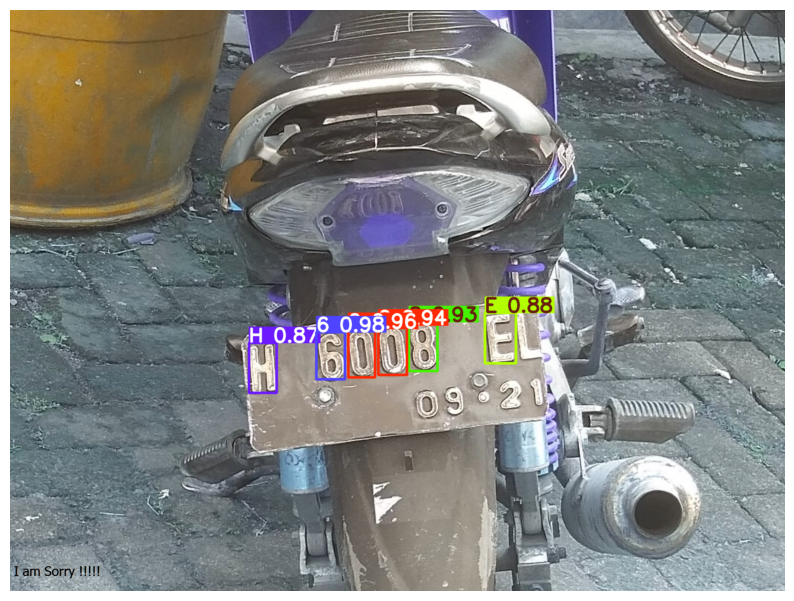

In [27]:
# @title Testing Model
# Upload file gambar
from google.colab import files
uploaded = files.upload()

# Ambil nama file yang di-upload
file_name = list(uploaded.keys())[0]

# Load YOLOv8
from ultralytics import YOLO
model = YOLO("runs/detect/yolo8-plat2/weights/best.pt")

# Jalankan prediksi
results = model.predict(
    source=file_name,  # gambar input
    conf=0.25,         # threshold confidence
    save=False         # TIDAK simpan hasil ke file
)

# Tampilkan hasil langsung
import matplotlib.pyplot as plt

# Ambil hasil deteksi yang sudah di-plot
img = results[0].plot()

# Tampilkan pakai matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

# **Kesimpulan**

## **Kesimpulan Final Model Deteksi Karakter**

Model deteksi karakter yang dikembangkan menggunakan YOLO menunjukkan performa yang sangat baik baik pada tahap *training* maupun *testing*. Model berhasil mencapai keseimbangan antara akurasi deteksi, presisi, dan kemampuan generalisasi pada data baru.

#### Hasil Training

* **Fitness**: 0.8608
* **Precision (B)**: 96,92%
* **Recall (B)**: 92,51%
* **mAP\@0.5 (B)**: 96,37%
* **mAP\@0.5-0.95 (B)**: 84,94%

#### Hasil Testing

* **Fitness**: 0.8770
* **Precision (B)**: 92,67%
* **Recall (B)**: 95,40%
* **mAP\@0.5 (B)**: 96,15%
* **mAP\@0.5-0.95 (B)**: 86,76%

#### Analisis

* Model mendeteksi karakter dengan presisi dan recall yang tinggi, menunjukkan konsistensi performa pada data pelatihan dan pengujian.
* Kelas dengan kinerja terbaik mencakup **'U' (94,72% mAP)**, **'R' (93,13% mAP)**, dan **'N' (93,69% mAP)**.
* Beberapa kelas dengan jumlah sampel terbatas seperti **'V' (77,21% mAP)**, **'X' (75,84% mAP)**, dan **'Z' (76,67% mAP)** menunjukkan potensi perbaikan pada dataset atau augmentasi data.
* Kecepatan inferensi rata-rata:

  * **Training**: 2,18 ms (inference), 2,71 ms (postprocess)
  * **Testing**: 9,15 ms (inference), 2,96 ms (postprocess)

#### Kesimpulan Akhir

Model dinilai **layak untuk diimplementasikan pada aplikasi nyata** dalam deteksi karakter, dengan tingkat akurasi tinggi dan waktu inferensi yang efisien. Diperlukan optimasi tambahan pada kelas minoritas dan evaluasi lebih lanjut pada lingkungan nyata untuk memastikan robustness model.